For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

   Use Pandas to import the data from "fcc-forum-pageviews.csv". 
   - Set the index to the date column.
   - Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
   - Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
   - The label on the x axis should be Date and the label on the y axis should be Page Views.
   - Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
   - Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

For each chart, make sure to use a copy of the data frame. Unit tests are written for you under test_module.py.

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ["date"], index_col=0)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [113]:
df = df.loc[~((df.value <= df.value.quantile(q = 0.025)) | (df.value >= df.value.quantile(q = 0.975)))]

In [114]:
df.max()

value    177588
dtype: int64

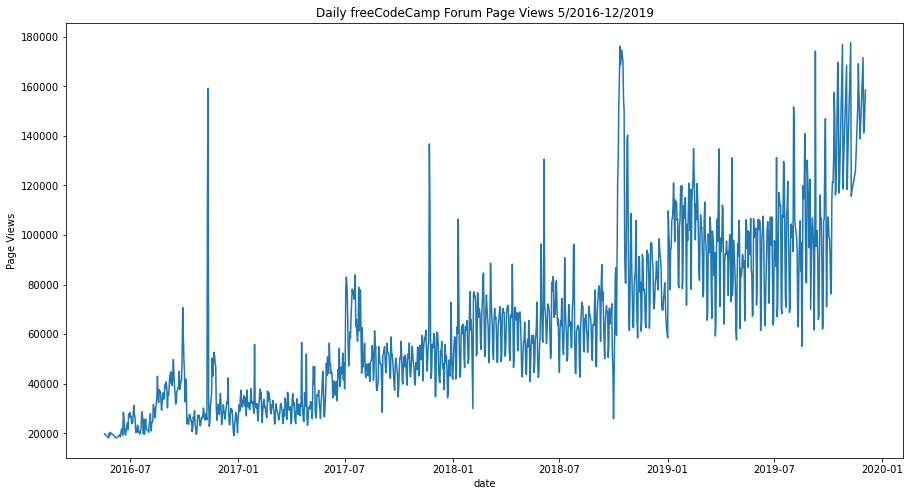

In [115]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x=df.index ,y = df.value)
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_ylabel('Page Views')
plt.show()

In [116]:
df['year'] = df.index.strftime('%Y')

In [117]:
df['month'] = df.index.strftime('%B')

In [118]:
df.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


In [120]:
df_mean = df.groupby(['year','month']).mean()

In [135]:
df_mean.reset_index(inplace=True)

In [136]:
df_mean.head()

,year,month,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000


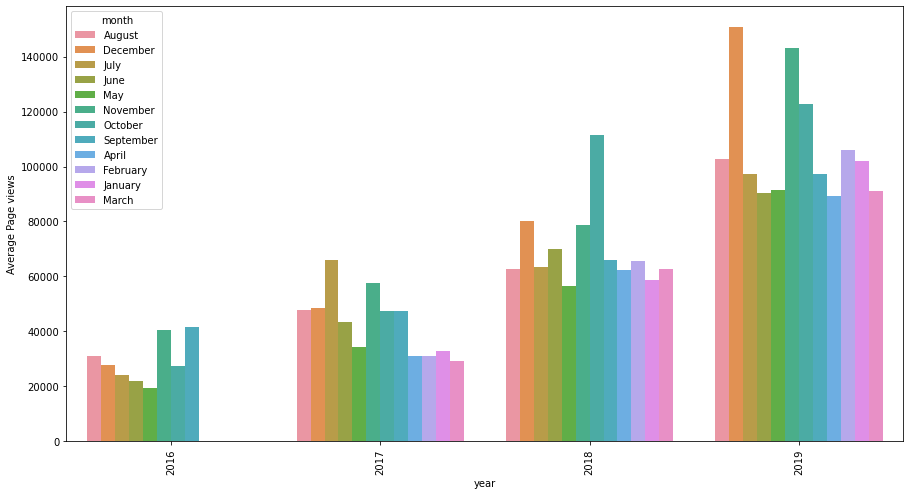

In [138]:
fig = plt.subplots(figsize = (15,8))
ax = sns.barplot(data = df_mean, x= 'year', y = 'value', hue='month' )
ax.set_ylabel("Average Page views")
ax.tick_params(axis='x', rotation=90)
plt.show()